In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
# Load data
data = pd.read_csv('data-crypto.csv')  # Replace with your file name
data['Date'] = pd.to_datetime(data['timestamp'])
data.set_index('Date', inplace=True)

In [52]:
# Columns: Ripple and Dogecoin prices
ripple_prices = data['ripple']
dogecoin_prices = data['dogecoin']

In [53]:
# Calculate daily returns
ripple_returns = ripple_prices.pct_change().dropna()
dogecoin_returns = dogecoin_prices.pct_change().dropna()

In [54]:
# Calculate historical metrics
ripple_mu = ripple_returns.mean()
ripple_sigma = ripple_returns.std()
dogecoin_mu = dogecoin_returns.mean()
dogecoin_sigma = dogecoin_returns.std()

In [55]:
# Simulation parameters
time_horizon = 365  # 1 year
steps = 1000  # Simulation steps
portfolio_weights = {'Ripple': 946.17, 'Dogecoin': 53.83}

In [56]:
# Simulate GBM for each cryptocurrency
def simulate_gbm(start_price, mu, sigma, time_horizon, steps):
    dt = time_horizon / steps
    price_path = [start_price]
    for _ in range(steps):
        price_path.append(price_path[-1] * np.exp((mu - 0.5 * sigma ** 2) * dt +
                                                  sigma * np.sqrt(dt) * np.random.normal()))
    return price_path

In [57]:
# Simulate prices
ripple_simulated = simulate_gbm(ripple_prices.iloc[-1], ripple_mu, ripple_sigma, time_horizon, steps)
dogecoin_simulated = simulate_gbm(dogecoin_prices.iloc[-1], dogecoin_mu, dogecoin_sigma, time_horizon, steps)

In [42]:
# Portfolio value at each time step
portfolio_value = [
    portfolio_weights['Ripple'] / ripple_prices.iloc[-1] * r +
    portfolio_weights['Dogecoin'] / dogecoin_prices.iloc[-1] * d
    for r, d in zip(ripple_simulated, dogecoin_simulated)
]

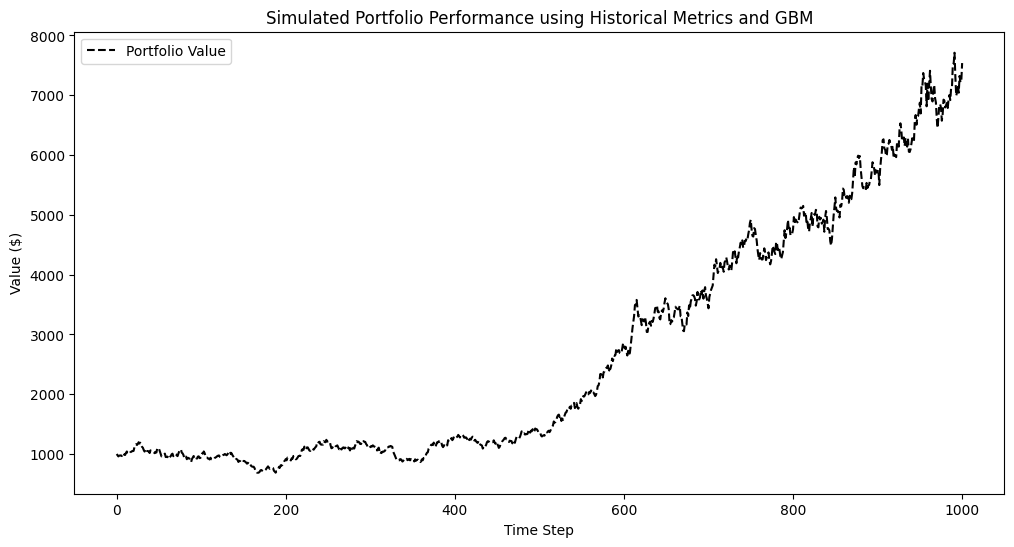

In [43]:
# Plot results
plt.figure(figsize=(12, 6))
plt.plot(range(len(portfolio_value)), portfolio_value, label='Portfolio Value', linestyle='--', color='black')
plt.xlabel('Time Step')
plt.ylabel('Value ($)')
plt.title('Simulated Portfolio Performance using Historical Metrics and GBM')
plt.legend()
plt.show()

In [ ]:
import plotly.graph_objects as go
from plotly.offline import plot

# Create the plot
fig = go.Figure()

# Add the simulated prices line
fig.add_trace(go.Scatter(
    x=list(range(len(portfolio_value))),
    y=portfolio_value,
    mode='lines',
    name='Simulated Prices',
    line=dict(color='royalblue', width=2, dash='dash')
))

# Update layout for aesthetics
fig.update_layout(
    title='Stock Price Prediction using Geometric Brownian Motion',
    xaxis_title='Time Step',
    yaxis_title='Price',
    font=dict(size=14),
    plot_bgcolor='white',
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=True, gridcolor='lightgrey')
)

# Render the plot in HTML
plot(fig, filename='stock_price_prediction.html')

AttributeError: 'function' object has no attribute 'show'